<a href="https://colab.research.google.com/github/rishabh9720/Image_detection/blob/master/Notebook_1(uploading_dataset_on_collab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Guyss, you will know when you see this okay brother so donot worry and chill okay

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import pandas as pd
import os

kag = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = kag.iloc[0][0]
os.environ['KAGGLE_KEY'] = kag.iloc[0][1]


In [4]:
from google.colab import files
uploaded = files.upload()

Saving jcb.csv to jcb.csv
Saving tractor.csv to tractor.csv
Saving urls_bicycle.csv to urls_bicycle.csv
Saving urls_bike.csv to urls_bike.csv
Saving urls_bus.csv to urls_bus.csv
Saving urls_car.csv to urls_car.csv
Saving urls_plain.csv to urls_plain.csv
Saving urls_ship.csv to urls_ship.csv
Saving urls_train.csv to urls_train.csv


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

In [6]:
folder = 'jcb'
url_file = 'jcb.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [7]:
folder = 'tractor'
url_file = 'tractor.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [8]:
folder = 'bicycle'
url_file = 'urls_bicycle.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [9]:
folder = 'bike'
url_file = 'urls_bike.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [10]:
folder = 'bus'
url_file = 'urls_bus.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [11]:
folder = 'car'
url_file = 'urls_car.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [12]:
folder = 'plain'
url_file = 'urls_plain.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [13]:
folder = 'ship'
url_file = 'urls_ship.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [14]:
folder = 'train'
url_file = 'urls_train.csv'
path = Path('my_data/my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [31]:
from PIL import Image
os.makedirs("/content/my_data/training_data",exist_ok=True)
inm=[]
j=0
tfiles=os.listdir("/content/my_data/my_data/")
for file in tfiles:
  tfile1=os.listdir("/content/my_data/my_data/"+file)
  i=0
  for x in tfile1:
    if i==30:
      break
    else:
      colorImage  = Image.open("/content/my_data/my_data/"+file+"/"+x)
      if colorImage.mode in ("RGBA", "P"):
         colorImage = colorImage.convert("RGB")
      colorImage.save("/content/my_data/training_data/"+str(j)+".jpg")
      i+=1
      j+=1

In [33]:
classes = ['bicycle', 'bike', 'bus', 'car', 'jcb', 'plain', 'ship', 'tractor', 'train']

In [34]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bicycle


bike


bus


car


jcb


plain


ship


tractor


train


In [35]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [36]:
data.classes

['bicycle', 'bike', 'bus', 'car', 'jcb', 'plain', 'ship', 'tractor', 'train']

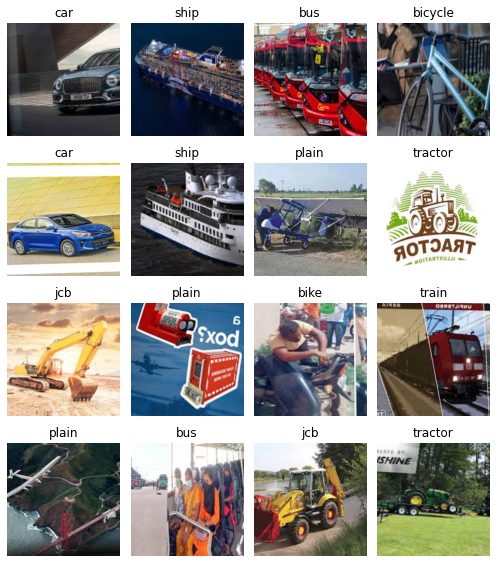

In [37]:
data.show_batch(rows=4, figsize=(7,8))

In [38]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bicycle', 'bike', 'bus', 'car', 'jcb', 'plain', 'ship', 'tractor', 'train'],
 9,
 4032,
 1007)

In [39]:
!kaggle datasets init -p /content/my_data

Data package template written to: /content/my_data/dataset-metadata.json


In [41]:
!kaggle datasets create --dir-mode zip -p /content/my_data

Starting upload for file training_data.zip
100% 2.94M/2.94M [00:09<00:00, 330kB/s]
Upload successful: training_data.zip (3MB)
Starting upload for file my_data.zip
100% 47.1M/47.1M [00:08<00:00, 5.62MB/s]
Upload successful: my_data.zip (47MB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/rrishabhgupta/VehicleBase
